## Movies Recommendations

In [5]:
# Reading in the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tests as t

%matplotlib inline

# Read in the datasets
movies = pd.read_csv('movies_clean.csv')
reviews = pd.read_csv('reviews_clean.csv')
del movies['Unnamed: 0']
del reviews['Unnamed: 0']

In [3]:
# number of movies
print("The number of movies is {}.".format(movies.shape[0]))

# number of ratings
print("The number of ratings is {}.".format(reviews.shape[0]))

# unique users
print("The number of unique users is {}.".format(reviews.user_id.nunique()))

# missing ratings
print("The number of missing reviews is {}.".format(int(reviews.rating.isnull().mean()*reviews.shape[0])))

# the average, min, and max ratings given
print("The average, minimum, and max ratings given are {}, {}, and {}, respectively.".format(np.round(reviews.rating.mean(), 0), reviews.rating.min(), reviews.rating.max()))

The number of movies is 31245.
The number of ratings is 712337.
The number of unique users is 53968.
The number of missing reviews is 0.
The average, minimum, and max ratings given are 7.0, 0, and 10, respectively.


In [4]:
# number of different genres
genres = []
for val in movies.genre:
    try:
        genres.extend(val.split('|'))
    except AttributeError:
        pass

# we end up needing this later
genres = set(genres)
print("The number of genres is {}.".format(len(genres)))

The number of genres is 28.


In [6]:
movies.head()

,movie_id,movie,genre,date,1800's,1900's,2000's,History,News,Horror,...,Fantasy,Romance,Game-Show,Action,Documentary,Animation,Comedy,Short,Western,Thriller
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short,1894,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,10,La sortie des usines Lumière (1895),Documentary|Short,1895,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,12,The Arrival of a Train (1896),Documentary|Short,1896,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,25,The Oxford and Cambridge University Boat Race ...,NaN,1895,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,91,Le manoir du diable (1896),Short|Horror,1896,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [7]:
reviews.head()

,user_id,movie_id,rating,timestamp,date,month_1,month_2,month_3,month_4,month_5,...,month_9,month_10,month_11,month_12,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,1,68646,10,1381620027,2013-10-12 23:20:27,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,113277,10,1379466669,2013-09-18 01:11:09,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,422720,8,1412178746,2014-10-01 15:52:26,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,2,454876,8,1394818630,2014-03-14 17:37:10,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,790636,7,1389963947,2014-01-17 13:05:47,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Part I: How To Find The Most Popular Movies?
​
The task is that no matter the user, we need to provide a list of the recommendations based on simply the most popular items.
​
For this task, we will consider what is "most popular" based on the following criteria:
​
* A movie with the highest average rating is considered best
* With ties, movies that have more ratings are better
* A movie must have a minimum of 5 ratings to be considered among the best movies
* If movies are tied in their average rating and number of ratings, the ranking is determined by the movie that is the most recent rating
​
With these criteria, the goal for this notebook is to take a **user_id** and provide back the **n_top** recommendations.  Use the function below as the scaffolding that will be used for all the future recommendations as well.

In [8]:
def my_funct(movies, reviews):
    
    '''
        INPUT
        movies - the movies dataframe
        reviews - the reviews dataframe
        
        OUTPUT
        ranked_movies - a dataframe with movies that are sorted by highest avg rating, more reviews, 
                        then time, and must have more than 4 ratings
    '''
    
    avg_rating = reviews.groupby('movie_id')['rating'].mean()
    num_reviews = reviews.groupby('movie_id')['rating'].count()
    review_date = reviews.groupby('movie_id')['date'].max()
    
    new_df = pd.DataFrame({'avg_rating':avg_rating, 'num_reviews':num_reviews, 'last_review_date':review_date})
    
    movie_df = movies.set_index('movie_id').join(new_df)
    movie_df = movie_df.sort_values(['avg_rating', 'num_reviews', 'last_review_date'], ascending=False)
    movie_df = movie_df[movie_df['num_reviews']>4]
    
    return movie_df
    
def popular_recommendations(user_id, n_top):
    
    '''
    INPUT:
    user_id - the user_id (str) of the individual you are making recommendations for
    n_top - an integer of the number recommendations you want back

    OUTPUT:
    top_movies - a list of the n_top recommended movies by movie title in order best to worst
    '''
    
    top_movies_df = my_funct(movies, reviews)
    top_movies = top_movies_df['movie'][:n_top]
    
    return list(top_movies)

In [9]:
popular_recommendations(1, 10)

['MSG 2 the Messenger (2015)',
 'Avengers: Age of Ultron Parody (2015)',
 'Sorry to Bother You (2018)',
 'Selam (2013)',
 "Quiet Riot: Well Now You're Here, There's No Way Back (2014)",
 'Crawl Bitch Crawl (2012)',
 'Make Like a Dog (2015)',
 'Pandorica (2016)',
 'Third Contact (2011)',
 'Romeo Juliet (2009)']

### Part II: Adding Filters

Now that we have created a function to give back the **n_top** movies, let's make it a bit more robust. We will add arguments that will act as filters for the movie **year** and **genre**.

In [10]:
def filtered_recommendations(user_id, n_top, years, genre):
    
    '''
    INPUT:
    user_id - the user_id (str) of the individual you are making recommendations for
    n_top - an integer of the number recommendations you want back
    years - a list of strings with years of movies
    genres - a list of strings with genres of movies
    
    OUTPUT:
    top_movies - a list of the n_top recommended movies by movie title in order best to worst
    '''
    
    top_movies_df = my_funct(movies, reviews)
    filtered_movies = top_movies_df[top_movies_df['date'].isin(years)]
    
    genre_check = top_movies_df[genre].sum(axis=1)
    
    filtered_movies = filtered_movies.loc[genre_check>0, :]
    top_movies = filtered_movies['movie'][:n_top]
    
    return list(top_movies)

In [11]:
top_movies = filtered_recommendations(1, 10, years = ['2015','2016'], genre=['History', 'News', 'Horror'])
top_movies

['I Believe in Miracles (2015)',
 'Requiem for the American Dream (2015)',
 'The Mask You Live In (2015)',
 'Sado (2015)',
 'Hatred (2016)',
 'Nise - O Coração da Loucura (2015)',
 'Straight Outta Compton (2015)',
 'Manjhi: The Mountain Man (2015)',
 'Only the Dead (2015)',
 'Spotlight (2015)']

## Recommendations with Collaborative Filtering

One of the most popular methods for making recommendations is **collaborative filtering**.  In collaborative filtering, you are using the collaboration of user-item recommendations to assist in making new recommendations.  

There are two main methods of performing collaborative filtering:

1. **Neighborhood-Based Collaborative Filtering**, which is based on the idea that we can either correlate items that are similar to provide recommendations or we can correlate users to one another to provide recommendations.

2. **Model Based Collaborative Filtering**, which is based on the idea that we can use machine learning and other mathematical models to understand the relationships that exist amongst items and users to predict ratings and provide ratings.


Here we will be working on performing **neighborhood-based collaborative filtering**.  There are two main methods for performing collaborative filtering:

1. **User-based collaborative filtering:** In this type of recommendation, users related to the user we would like to make recommendations for are used to create a recommendation.

2. **Item-based collaborative filtering:** In this type of recommendation, first we need to find the items that are most related to each other item (based on similar ratings).  Then we can use the ratings of an individual on those similar items to understand if a user will like the new item.

We will be implementing **user-based collaborative filtering**.  However, it is easy to extend this approach to make recommendations using **item-based collaborative filtering**.  First, let's read in our data and necessary libraries.

In [13]:
user_item = reviews[['user_id', 'movie_id', 'rating']]
user_item.head()

,user_id,movie_id,rating
0,1,68646,10
1,1,113277,10
2,2,422720,8
3,2,454876,8
4,2,790636,7


In [14]:
user_item_matrix = user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()
user_item_matrix.head()

movie_id,8,10,12,25,91,417,439,443,628,833,...,8144778,8144868,8206708,8289196,8324578,8335880,8342748,8342946,8402090,8439854
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
def movies_watched(user_id):
    
    '''
    INPUT:
    user_id - the user_id of an individual as int
    OUTPUT:
    movies - an array of movies the user has watched
    '''
    
    user_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id].isnull()==False].index.values
    
    return list(user_movies)

def create_dict():
    
    '''
    INPUT: None
    OUTPUT: movies_seen - a dictionary where each key is a user_id and the value is an array of movie_ids
    
    Creates the movies_seen dictionary
    '''
    
    movie_dict = dict()
    
    n_users = user_item_matrix.shape[0]
    
    for user in range(1, n_users+1):
        
        movie_dict[user] = movies_watched(user)
        
    return movie_dict

In [16]:
movies_seen = create_dict()

In [17]:
def movies_to_analyze(movies_seen, lower_bound=2):
    
    '''
    INPUT:  
    movies_seen - a dictionary where each key is a user_id and the value is an array of movie_ids
    lower_bound - (an int) a user must have more movies seen than the lower bound to be added to the movies_to_analyze dictionary

    OUTPUT: 
    movies_to_analyze - a dictionary where each key is a user_id and the value is an array of movie_ids
    
    The movies_seen and movies_to_analyze dictionaries should be the same except that the output dictionary has removed 
    
    '''
    
    n_users = user_item_matrix.shape[0]
    movies_seen_new = dict()
    
    for user in range(1, n_users+1):
        if len(movies_seen[user]) > lower_bound:
            movies_seen_new[user] = movies_seen[user]
        else:
            pass
    
    return movies_seen_new

In [18]:
movies_new = movies_to_analyze(movies_seen, lower_bound=2)

### Calculating User Similarities

Now that we have set up the **movies_to_analyze** dictionary, it is time to take a closer look at the similarities between users.

In [22]:
from scipy.spatial.distance import euclidean

def compute_distance(user1, user2):
    
    '''
    INPUT
    user1 - int user_id
    user2 - int user_id
    OUTPUT
    the correlation between the matching ratings between the two users
    '''
    
    movies1 = movies_new[user1]
    movies2 = movies_new[user2]
    
    common_movies = np.intersect1d(movies1, movies2, assume_unique=True)
    
    df = user_item_matrix.loc[(user1, user2), common_movies]
    
    dist = np.linalg.norm(df.loc[user1] - df.loc[user2])
    
    return dist

In [20]:
import pickle
df_dist = pd.read_pickle("files/dists.p")

In [21]:
df_dist.head()

,user1,user2,eucl_dist
0,2,2,0.000000
1,2,66,2.236068
2,2,90,5.385165
3,2,99,2.828427
4,2,104,2.000000


### Using the Nearest Neighbors to Make Recommendations

In the previous section, we read in **df_dists**. Therefore, we have a measure of distance between each user and every other user. This dataframe holds every possible pairing of users, as well as the corresponding euclidean distance.

We will want to find the users that are 'nearest' each user.  Then we will want to find the movies the closest neighbors have liked to recommend to each user.

We made use of the following objects:

* df_dists (to obtain the neighbors)
* user_items (to obtain the movies the neighbors and users have rated)
* movies (to obtain the names of the movies)

In [23]:
def find_closest_neighbors(user):
    
    '''
    INPUT:
        user - (int) the user_id of the individual you want to find the closest users
    OUTPUT:
        closest_neighbors - an array of the id's of the users sorted from closest to farthest away
    '''
    
    
    closets_neighbors = df_dist[df_dist['user1'] == user].sort_values('eucl_dist')[1:]['user2'].values
    
    return closets_neighbors

In [24]:
def movies_liked(user_id, min_rating = 7):
    
    '''
    INPUT:
    user_id - the user_id of an individual as int
    min_rating - the minimum rating considered while still a movie is still a "like" and not a "dislike"
    OUTPUT:
    movies_liked - an array of movies the user has watched and liked
    '''
    
    movies_liked = user_item.query("user_id == @user_id and rating > (@min_rating-1)")['movie_id']
    
    return movies_liked

In [25]:
def movie_names(movie_ids):
    
    '''
    INPUT
    movie_ids - a list of movie_ids
    OUTPUT
    movies - a list of movie names associated with the movie_ids
    
    '''
    
    movie_list = movies[movies['movie_id'].isin(movie_ids)]['movie'].values
        
    return movie_list

In [26]:
def make_recommendations(user, num_recs=10):
    
    '''
    INPUT:
        user - (int) a user_id of the individual you want to make recommendations for
        num_recs - (int) number of movies to return
    OUTPUT:
        recommendations - a list of movies - if there are "num_recs" recommendations return this many
                          otherwise return the total number of recommendations available for the "user"
                          which may just be an empty list
    '''
    
    movies_user = movies_watched(user)
    
    closest_neighbors = find_closest_neighbors(user)
    
    recs = np.array([])
    
    for neighbor in closest_neighbors:
        
        neighbor_movies = movies_liked(neighbor)
        new_recs = np.setdiff1d(neighbor_movies, movies_user, assume_unique=True)
        recs = np.unique(np.concatenate([new_recs, recs], axis=0))
        
        if len(recs) > num_recs-1:
            break
        
    recs = recs[:10]
    recommendations = movie_names(recs)
    
    return recommendations

In [27]:
make_recommendations(104, num_recs=10)

array(['Alien (1979)', 'The Thing (1982)', 'Aliens (1986)',
       'Mulholland Dr. (2001)', 'American Beauty (1999)',
       'A Beautiful Mind (2001)', 'El laberinto del fauno (2006)',
       'The Prestige (2006)', 'Interstellar (2014)',
       'The Adventures of Tintin (2011)'], dtype=object)

In [29]:
def all_recommendations(num_recs=10):
    '''
    INPUT 
        num_recs (int) the (max) number of recommendations for each user
    OUTPUT
        all_recs - a dictionary where each key is a user_id and the value is an array of recommended movie titles
    '''
    
    # All the users we need to make recommendations for
    users = np.unique(df_dists['user1'])
    n_users = len(users)
    
    #Store all recommendations in this dictionary
    all_recs = dict()
    
    # Make the recommendations for each user
    for user in users:
        all_recs[user] = make_recommendations(user, num_recs)
    
    return all_recs

In [28]:
all_recs = pd.read_pickle('files/all_recs.p')
all_recs[2]

['Philadelphia (1993)',
 'Training Day (2001)',
 'About Schmidt (2002)',
 'Insomnia (2002)',
 'The United States of Leland (2003)',
 'Shattered Glass (2003)',
 'Man on Fire (2004)',
 'Flipped (2010)',
 'Silver Linings Playbook (2012)',
 'Lawless (2012)',
 '50/50 (2011)',
 'Crazy, Stupid, Love. (2011)',
 'The Perks of Being a Wallflower (2012)',
 'Before I Go to Sleep (2014)',
 'Zero Dark Thirty (2012)',
 'American Hustle (2013)',
 'Django Unchained (2012)',
 'Side Effects (2013)',
 'Gone Girl (2014)',
 'Enough Said (2013)',
 'Nightcrawler (2014)']

Let's find out how for how many users we still can't make 10 recommendations

In [43]:
# Users with fewer than 10 recs
users_with_less_than_10recs = []
for user, movie_recs in all_recs.items():
    if len(movie_recs) < 10:
        users_with_less_than_10recs.append(user)
    
len(users_with_less_than_10recs)

1325

### Content Based Recommendations

In the previous sections, we made recommendations using collaborative filtering.  However, using this technique there are a large number of users who were left without any recommendations at all.  Other users were left with fewer than the ten recommendations that were set up by our function to retrieve...

In order to help these users out, let's try another technique **content based** recommendations.

In [30]:
all_users = df_dist['user1'].unique()

In [31]:
users_with_recs = []

for user in all_users:
    if len(all_recs[user]) > 9:
        users_with_recs.append(user)

In [32]:
users_who_need_recs = np.setdiff1d(all_users, np.array(users_with_recs))

### Similarities

In many cases, it turns out that one of the fastest ways we can find out how similar items are to one another (when our matrix isn't totally sparse like it was in the earlier section) is by simply using matrix multiplication.

For us to pull out a matrix that describes the movies in our dataframe in terms of content, we might just use the indicator variables related to **year** and **genre** for our movies.

Then we can obtain a matrix of how similar movies are to one another by taking the dot product of this matrix with itself. If the dot product gives higher value that indicates higher similarity.

We can perform the dot product on a matrix of movies with content characteristics to provide a movie by movie matrix where each cell is an indication of how similar two movies are to one another.

The diagonal elements of the matrix will contain the similarity of a movie with itself, which will be the largest possible similarity

Create a numpy array that is a matrix of indicator variables related to year (by century) and movie genres by movie.  Perform the dot product of this matrix with itself (transposed) to obtain a similarity matrix of each movie with every other movie.  The final matrix should be 31245 x 31245.

In [34]:
movie_features = np.array(movies.iloc[:,4:])
movie_mat = movie_features.dot(np.transpose(movie_features))

In [35]:
def find_similar_movies(movie_id):
    
    '''
    INPUT
    movie_id - a movie_id 
    OUTPUT
    similar_movies - an array of the most similar movies by title
    '''
    
    movie_idx = movies[movies['movie_id']==movie_id].index.values[0]
    sim_idx = np.where(movie_mat[movie_idx] == np.max(movie_mat[movie_idx]))[0]
    similar_movies = np.array(movies.iloc[sim_idx, ]['movie'])
    
    return similar_movies

In [36]:
find_similar_movies(91)

array(['Le manoir du diable (1896)'], dtype=object)

In [37]:
reviews_sorted = reviews.sort_values(by=['user_id', 'rating'], ascending=False)

reviews_sorted.head()

,user_id,movie_id,rating,timestamp,date,month_1,month_2,month_3,month_4,month_5,...,month_9,month_10,month_11,month_12,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
712335,53968,1559547,2,1373287369,2013-07-08 12:42:49,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
712336,53968,2415464,2,1373772560,2013-07-14 03:29:20,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
712334,53967,816711,8,1371972851,2013-06-23 07:34:11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
711725,53966,338751,10,1362328708,2013-03-03 16:38:28,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
711730,53966,404032,10,1453328244,2016-01-20 22:17:24,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
from collections import defaultdict

def make_recs():
    
    '''
    INPUT
    None
    OUTPUT
    recs - a dictionary with keys of the user and values of the recommendations
    '''
    
    recs = defaultdict(set)
    
    for user in users_who_need_recs:
        most_liked_movies = reviews_sorted[reviews_sorted['user_id']==user]['movie_id'].values
        most_liked_movies_names = movie_names(most_liked_movies)
        
        for movie_ in most_liked_movies:
            sim_movies = find_similar_movies(movie_)
            new_movies = np.setdiff1d(sim_movies, most_liked_movies_names)
            recs[user].update(new_movies)
            
        if len(recs[user]) > 9:
            break
            
    return recs

In [41]:
recs = make_recs()

### How Did We Do?

Now that you have made the recommendations, how did we do in providing everyone with a set of recommendations?

In [45]:
# Explore recommendations
users_without_all_recs = []
users_with_all_recs = []
no_recs = []
for user, movie_recs in recs.items():
    if len(movie_recs) < 10:
        users_without_all_recs.append(user)
    if len(movie_recs) > 9:
        users_with_all_recs.append(user)
    if len(movie_recs) == 0:
        no_recs.append(user)

In [46]:
# Some characteristics of the content based recommendations
print("There were {} users without all 10 recommendations we would have liked to have.".format(len(users_without_all_recs)))
print("There were {} users with all 10 recommendations we would like them to have.".format(len(users_with_all_recs)))
print("There were {} users with no recommendations at all!".format(len(no_recs)))

There were 0 users without all 10 recommendations we would have liked to have.
There were 1 users with all 10 recommendations we would like them to have.
There were 0 users with no recommendations at all!


### Implementing FunkSVD - Solution

In this section we will take a look at writing our own function that performs FunkSVD.

To test our algorithm, we will run it on the subset of the data we worked with earlier.

In [47]:
from scipy import sparse

# Create data subset
user_movie_subset = user_item_matrix[[73486, 75314,  68646, 99685]].dropna(axis=0)
ratings_mat = np.matrix(user_movie_subset)
print(ratings_mat)

[[10. 10. 10. 10.]
 [10.  4.  9. 10.]
 [ 8.  9. 10.  5.]
 [ 9.  8. 10. 10.]
 [10.  5.  9.  9.]
 [ 6.  4. 10.  6.]
 [ 9.  8. 10.  9.]
 [10.  5.  9.  8.]
 [ 7.  8. 10.  8.]
 [ 9.  5.  9.  7.]
 [ 9.  8. 10.  8.]
 [ 9. 10. 10.  9.]
 [10.  9. 10.  8.]
 [ 5.  8.  5.  8.]
 [10.  8. 10. 10.]
 [ 9.  9. 10. 10.]
 [ 9.  8.  8.  8.]
 [10.  8.  1. 10.]
 [ 5.  6. 10. 10.]
 [ 8.  7. 10.  7.]]


In [48]:
def FunkSVD(ratings_mat, latent_features=12, learning_rate=0.0001, iters=100):
    '''
    This function performs matrix factorization using a basic form of FunkSVD with no regularization
    
    INPUT:
    ratings_mat - (numpy array) a matrix with users as rows, movies as columns, and ratings as values
    latent_features - (int) the number of latent features used
    learning_rate - (float) the learning rate 
    iters - (int) the number of iterations
    
    OUTPUT:
    user_mat - (numpy array) a user by latent feature matrix
    movie_mat - (numpy array) a latent feature by movie matrix
    '''
    
    # Set up useful values to be used through the rest of the function
    n_users = ratings_mat.shape[0]
    n_movies = ratings_mat.shape[1]
    num_ratings = np.count_nonzero(~np.isnan(ratings_mat))
    
    # initialize the user and movie matrices with random values
    user_mat = np.random.rand(n_users, latent_features)
    movie_mat = np.random.rand(latent_features, n_movies)
    
    # initialize sse at 0 for first iteration
    sse_accum = 0
    
    # keep track of iteration and MSE
    print("Optimizaiton Statistics")
    print("Iterations | Mean Squared Error ")
    
    # for each iteration
    for iteration in range(iters):

        # update our sse
        old_sse = sse_accum
        sse_accum = 0
        
        # For each user-movie pair
        for i in range(n_users):
            for j in range(n_movies):
                
                # if the rating exists
                if ratings_mat[i, j] > 0:
                    
                    # compute the error as the actual minus the dot product of the user and movie latent features
                    diff = ratings_mat[i, j] - np.dot(user_mat[i, :], movie_mat[:, j])
                    
                    # Keep track of the sum of squared errors for the matrix
                    sse_accum += diff**2
                    
                    # update the values in each matrix in the direction of the gradient
                    for k in range(latent_features):
                        user_mat[i, k] += learning_rate * (2*diff*movie_mat[k, j])
                        movie_mat[k, j] += learning_rate * (2*diff*user_mat[i, k])

        # print results
        print("%d \t\t %f" % (iteration+1, sse_accum / num_ratings))
        
    return user_mat, movie_mat 

In [49]:
user_mat, movie_mat = FunkSVD(ratings_mat, latent_features=4, learning_rate=0.005, iters=10000)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 45.167077
2 		 16.056517
3 		 4.313344
4 		 2.880115
5 		 2.746958
6 		 2.711363
7 		 2.690355
8 		 2.670945
9 		 2.649886
10 		 2.626069
11 		 2.598822
12 		 2.567547
13 		 2.531653
14 		 2.490560
15 		 2.443736
16 		 2.390734
17 		 2.331256
18 		 2.265210
19 		 2.192782
20 		 2.114492
21 		 2.031230
22 		 1.944260
23 		 1.855161
24 		 1.765734
25 		 1.677849
26 		 1.593273
27 		 1.513507
28 		 1.439663
29 		 1.372398
30 		 1.311928
31 		 1.258087
32 		 1.210434
33 		 1.168359
34 		 1.131189
35 		 1.098257
36 		 1.068957
37 		 1.042762
38 		 1.019233
39 		 0.998011
40 		 0.978805
41 		 0.961377
42 		 0.945530
43 		 0.931095
44 		 0.917921
45 		 0.905870
46 		 0.894814
47 		 0.884626
48 		 0.875186
49 		 0.866377
50 		 0.858082
51 		 0.850187
52 		 0.842582
53 		 0.835158
54 		 0.827806
55 		 0.820420
56 		 0.812896
57 		 0.805127
58 		 0.797007
59 		 0.788429
60 		 0.779283
61 		 0.769458
62 		 0.758841
63 		 0.747316
64 		

636 		 0.000000
637 		 0.000000
638 		 0.000000
639 		 0.000000
640 		 0.000000
641 		 0.000000
642 		 0.000000
643 		 0.000000
644 		 0.000000
645 		 0.000000
646 		 0.000000
647 		 0.000000
648 		 0.000000
649 		 0.000000
650 		 0.000000
651 		 0.000000
652 		 0.000000
653 		 0.000000
654 		 0.000000
655 		 0.000000
656 		 0.000000
657 		 0.000000
658 		 0.000000
659 		 0.000000
660 		 0.000000
661 		 0.000000
662 		 0.000000
663 		 0.000000
664 		 0.000000
665 		 0.000000
666 		 0.000000
667 		 0.000000
668 		 0.000000
669 		 0.000000
670 		 0.000000
671 		 0.000000
672 		 0.000000
673 		 0.000000
674 		 0.000000
675 		 0.000000
676 		 0.000000
677 		 0.000000
678 		 0.000000
679 		 0.000000
680 		 0.000000
681 		 0.000000
682 		 0.000000
683 		 0.000000
684 		 0.000000
685 		 0.000000
686 		 0.000000
687 		 0.000000
688 		 0.000000
689 		 0.000000
690 		 0.000000
691 		 0.000000
692 		 0.000000
693 		 0.000000
694 		 0.000000
695 		 0.000000
696 		 0.000000
697 		 0.000000
698 		 0

1241 		 0.000000
1242 		 0.000000
1243 		 0.000000
1244 		 0.000000
1245 		 0.000000
1246 		 0.000000
1247 		 0.000000
1248 		 0.000000
1249 		 0.000000
1250 		 0.000000
1251 		 0.000000
1252 		 0.000000
1253 		 0.000000
1254 		 0.000000
1255 		 0.000000
1256 		 0.000000
1257 		 0.000000
1258 		 0.000000
1259 		 0.000000
1260 		 0.000000
1261 		 0.000000
1262 		 0.000000
1263 		 0.000000
1264 		 0.000000
1265 		 0.000000
1266 		 0.000000
1267 		 0.000000
1268 		 0.000000
1269 		 0.000000
1270 		 0.000000
1271 		 0.000000
1272 		 0.000000
1273 		 0.000000
1274 		 0.000000
1275 		 0.000000
1276 		 0.000000
1277 		 0.000000
1278 		 0.000000
1279 		 0.000000
1280 		 0.000000
1281 		 0.000000
1282 		 0.000000
1283 		 0.000000
1284 		 0.000000
1285 		 0.000000
1286 		 0.000000
1287 		 0.000000
1288 		 0.000000
1289 		 0.000000
1290 		 0.000000
1291 		 0.000000
1292 		 0.000000
1293 		 0.000000
1294 		 0.000000
1295 		 0.000000
1296 		 0.000000
1297 		 0.000000
1298 		 0.000000
1299 		 0.0000

1742 		 0.000000
1743 		 0.000000
1744 		 0.000000
1745 		 0.000000
1746 		 0.000000
1747 		 0.000000
1748 		 0.000000
1749 		 0.000000
1750 		 0.000000
1751 		 0.000000
1752 		 0.000000
1753 		 0.000000
1754 		 0.000000
1755 		 0.000000
1756 		 0.000000
1757 		 0.000000
1758 		 0.000000
1759 		 0.000000
1760 		 0.000000
1761 		 0.000000
1762 		 0.000000
1763 		 0.000000
1764 		 0.000000
1765 		 0.000000
1766 		 0.000000
1767 		 0.000000
1768 		 0.000000
1769 		 0.000000
1770 		 0.000000
1771 		 0.000000
1772 		 0.000000
1773 		 0.000000
1774 		 0.000000
1775 		 0.000000
1776 		 0.000000
1777 		 0.000000
1778 		 0.000000
1779 		 0.000000
1780 		 0.000000
1781 		 0.000000
1782 		 0.000000
1783 		 0.000000
1784 		 0.000000
1785 		 0.000000
1786 		 0.000000
1787 		 0.000000
1788 		 0.000000
1789 		 0.000000
1790 		 0.000000
1791 		 0.000000
1792 		 0.000000
1793 		 0.000000
1794 		 0.000000
1795 		 0.000000
1796 		 0.000000
1797 		 0.000000
1798 		 0.000000
1799 		 0.000000
1800 		 0.0000

2317 		 0.000000
2318 		 0.000000
2319 		 0.000000
2320 		 0.000000
2321 		 0.000000
2322 		 0.000000
2323 		 0.000000
2324 		 0.000000
2325 		 0.000000
2326 		 0.000000
2327 		 0.000000
2328 		 0.000000
2329 		 0.000000
2330 		 0.000000
2331 		 0.000000
2332 		 0.000000
2333 		 0.000000
2334 		 0.000000
2335 		 0.000000
2336 		 0.000000
2337 		 0.000000
2338 		 0.000000
2339 		 0.000000
2340 		 0.000000
2341 		 0.000000
2342 		 0.000000
2343 		 0.000000
2344 		 0.000000
2345 		 0.000000
2346 		 0.000000
2347 		 0.000000
2348 		 0.000000
2349 		 0.000000
2350 		 0.000000
2351 		 0.000000
2352 		 0.000000
2353 		 0.000000
2354 		 0.000000
2355 		 0.000000
2356 		 0.000000
2357 		 0.000000
2358 		 0.000000
2359 		 0.000000
2360 		 0.000000
2361 		 0.000000
2362 		 0.000000
2363 		 0.000000
2364 		 0.000000
2365 		 0.000000
2366 		 0.000000
2367 		 0.000000
2368 		 0.000000
2369 		 0.000000
2370 		 0.000000
2371 		 0.000000
2372 		 0.000000
2373 		 0.000000
2374 		 0.000000
2375 		 0.0000

2862 		 0.000000
2863 		 0.000000
2864 		 0.000000
2865 		 0.000000
2866 		 0.000000
2867 		 0.000000
2868 		 0.000000
2869 		 0.000000
2870 		 0.000000
2871 		 0.000000
2872 		 0.000000
2873 		 0.000000
2874 		 0.000000
2875 		 0.000000
2876 		 0.000000
2877 		 0.000000
2878 		 0.000000
2879 		 0.000000
2880 		 0.000000
2881 		 0.000000
2882 		 0.000000
2883 		 0.000000
2884 		 0.000000
2885 		 0.000000
2886 		 0.000000
2887 		 0.000000
2888 		 0.000000
2889 		 0.000000
2890 		 0.000000
2891 		 0.000000
2892 		 0.000000
2893 		 0.000000
2894 		 0.000000
2895 		 0.000000
2896 		 0.000000
2897 		 0.000000
2898 		 0.000000
2899 		 0.000000
2900 		 0.000000
2901 		 0.000000
2902 		 0.000000
2903 		 0.000000
2904 		 0.000000
2905 		 0.000000
2906 		 0.000000
2907 		 0.000000
2908 		 0.000000
2909 		 0.000000
2910 		 0.000000
2911 		 0.000000
2912 		 0.000000
2913 		 0.000000
2914 		 0.000000
2915 		 0.000000
2916 		 0.000000
2917 		 0.000000
2918 		 0.000000
2919 		 0.000000
2920 		 0.0000

3418 		 0.000000
3419 		 0.000000
3420 		 0.000000
3421 		 0.000000
3422 		 0.000000
3423 		 0.000000
3424 		 0.000000
3425 		 0.000000
3426 		 0.000000
3427 		 0.000000
3428 		 0.000000
3429 		 0.000000
3430 		 0.000000
3431 		 0.000000
3432 		 0.000000
3433 		 0.000000
3434 		 0.000000
3435 		 0.000000
3436 		 0.000000
3437 		 0.000000
3438 		 0.000000
3439 		 0.000000
3440 		 0.000000
3441 		 0.000000
3442 		 0.000000
3443 		 0.000000
3444 		 0.000000
3445 		 0.000000
3446 		 0.000000
3447 		 0.000000
3448 		 0.000000
3449 		 0.000000
3450 		 0.000000
3451 		 0.000000
3452 		 0.000000
3453 		 0.000000
3454 		 0.000000
3455 		 0.000000
3456 		 0.000000
3457 		 0.000000
3458 		 0.000000
3459 		 0.000000
3460 		 0.000000
3461 		 0.000000
3462 		 0.000000
3463 		 0.000000
3464 		 0.000000
3465 		 0.000000
3466 		 0.000000
3467 		 0.000000
3468 		 0.000000
3469 		 0.000000
3470 		 0.000000
3471 		 0.000000
3472 		 0.000000
3473 		 0.000000
3474 		 0.000000
3475 		 0.000000
3476 		 0.0000

3954 		 0.000000
3955 		 0.000000
3956 		 0.000000
3957 		 0.000000
3958 		 0.000000
3959 		 0.000000
3960 		 0.000000
3961 		 0.000000
3962 		 0.000000
3963 		 0.000000
3964 		 0.000000
3965 		 0.000000
3966 		 0.000000
3967 		 0.000000
3968 		 0.000000
3969 		 0.000000
3970 		 0.000000
3971 		 0.000000
3972 		 0.000000
3973 		 0.000000
3974 		 0.000000
3975 		 0.000000
3976 		 0.000000
3977 		 0.000000
3978 		 0.000000
3979 		 0.000000
3980 		 0.000000
3981 		 0.000000
3982 		 0.000000
3983 		 0.000000
3984 		 0.000000
3985 		 0.000000
3986 		 0.000000
3987 		 0.000000
3988 		 0.000000
3989 		 0.000000
3990 		 0.000000
3991 		 0.000000
3992 		 0.000000
3993 		 0.000000
3994 		 0.000000
3995 		 0.000000
3996 		 0.000000
3997 		 0.000000
3998 		 0.000000
3999 		 0.000000
4000 		 0.000000
4001 		 0.000000
4002 		 0.000000
4003 		 0.000000
4004 		 0.000000
4005 		 0.000000
4006 		 0.000000
4007 		 0.000000
4008 		 0.000000
4009 		 0.000000
4010 		 0.000000
4011 		 0.000000
4012 		 0.0000

4498 		 0.000000
4499 		 0.000000
4500 		 0.000000
4501 		 0.000000
4502 		 0.000000
4503 		 0.000000
4504 		 0.000000
4505 		 0.000000
4506 		 0.000000
4507 		 0.000000
4508 		 0.000000
4509 		 0.000000
4510 		 0.000000
4511 		 0.000000
4512 		 0.000000
4513 		 0.000000
4514 		 0.000000
4515 		 0.000000
4516 		 0.000000
4517 		 0.000000
4518 		 0.000000
4519 		 0.000000
4520 		 0.000000
4521 		 0.000000
4522 		 0.000000
4523 		 0.000000
4524 		 0.000000
4525 		 0.000000
4526 		 0.000000
4527 		 0.000000
4528 		 0.000000
4529 		 0.000000
4530 		 0.000000
4531 		 0.000000
4532 		 0.000000
4533 		 0.000000
4534 		 0.000000
4535 		 0.000000
4536 		 0.000000
4537 		 0.000000
4538 		 0.000000
4539 		 0.000000
4540 		 0.000000
4541 		 0.000000
4542 		 0.000000
4543 		 0.000000
4544 		 0.000000
4545 		 0.000000
4546 		 0.000000
4547 		 0.000000
4548 		 0.000000
4549 		 0.000000
4550 		 0.000000
4551 		 0.000000
4552 		 0.000000
4553 		 0.000000
4554 		 0.000000
4555 		 0.000000
4556 		 0.0000

5019 		 0.000000
5020 		 0.000000
5021 		 0.000000
5022 		 0.000000
5023 		 0.000000
5024 		 0.000000
5025 		 0.000000
5026 		 0.000000
5027 		 0.000000
5028 		 0.000000
5029 		 0.000000
5030 		 0.000000
5031 		 0.000000
5032 		 0.000000
5033 		 0.000000
5034 		 0.000000
5035 		 0.000000
5036 		 0.000000
5037 		 0.000000
5038 		 0.000000
5039 		 0.000000
5040 		 0.000000
5041 		 0.000000
5042 		 0.000000
5043 		 0.000000
5044 		 0.000000
5045 		 0.000000
5046 		 0.000000
5047 		 0.000000
5048 		 0.000000
5049 		 0.000000
5050 		 0.000000
5051 		 0.000000
5052 		 0.000000
5053 		 0.000000
5054 		 0.000000
5055 		 0.000000
5056 		 0.000000
5057 		 0.000000
5058 		 0.000000
5059 		 0.000000
5060 		 0.000000
5061 		 0.000000
5062 		 0.000000
5063 		 0.000000
5064 		 0.000000
5065 		 0.000000
5066 		 0.000000
5067 		 0.000000
5068 		 0.000000
5069 		 0.000000
5070 		 0.000000
5071 		 0.000000
5072 		 0.000000
5073 		 0.000000
5074 		 0.000000
5075 		 0.000000
5076 		 0.000000
5077 		 0.0000

5589 		 0.000000
5590 		 0.000000
5591 		 0.000000
5592 		 0.000000
5593 		 0.000000
5594 		 0.000000
5595 		 0.000000
5596 		 0.000000
5597 		 0.000000
5598 		 0.000000
5599 		 0.000000
5600 		 0.000000
5601 		 0.000000
5602 		 0.000000
5603 		 0.000000
5604 		 0.000000
5605 		 0.000000
5606 		 0.000000
5607 		 0.000000
5608 		 0.000000
5609 		 0.000000
5610 		 0.000000
5611 		 0.000000
5612 		 0.000000
5613 		 0.000000
5614 		 0.000000
5615 		 0.000000
5616 		 0.000000
5617 		 0.000000
5618 		 0.000000
5619 		 0.000000
5620 		 0.000000
5621 		 0.000000
5622 		 0.000000
5623 		 0.000000
5624 		 0.000000
5625 		 0.000000
5626 		 0.000000
5627 		 0.000000
5628 		 0.000000
5629 		 0.000000
5630 		 0.000000
5631 		 0.000000
5632 		 0.000000
5633 		 0.000000
5634 		 0.000000
5635 		 0.000000
5636 		 0.000000
5637 		 0.000000
5638 		 0.000000
5639 		 0.000000
5640 		 0.000000
5641 		 0.000000
5642 		 0.000000
5643 		 0.000000
5644 		 0.000000
5645 		 0.000000
5646 		 0.000000
5647 		 0.0000

6159 		 0.000000
6160 		 0.000000
6161 		 0.000000
6162 		 0.000000
6163 		 0.000000
6164 		 0.000000
6165 		 0.000000
6166 		 0.000000
6167 		 0.000000
6168 		 0.000000
6169 		 0.000000
6170 		 0.000000
6171 		 0.000000
6172 		 0.000000
6173 		 0.000000
6174 		 0.000000
6175 		 0.000000
6176 		 0.000000
6177 		 0.000000
6178 		 0.000000
6179 		 0.000000
6180 		 0.000000
6181 		 0.000000
6182 		 0.000000
6183 		 0.000000
6184 		 0.000000
6185 		 0.000000
6186 		 0.000000
6187 		 0.000000
6188 		 0.000000
6189 		 0.000000
6190 		 0.000000
6191 		 0.000000
6192 		 0.000000
6193 		 0.000000
6194 		 0.000000
6195 		 0.000000
6196 		 0.000000
6197 		 0.000000
6198 		 0.000000
6199 		 0.000000
6200 		 0.000000
6201 		 0.000000
6202 		 0.000000
6203 		 0.000000
6204 		 0.000000
6205 		 0.000000
6206 		 0.000000
6207 		 0.000000
6208 		 0.000000
6209 		 0.000000
6210 		 0.000000
6211 		 0.000000
6212 		 0.000000
6213 		 0.000000
6214 		 0.000000
6215 		 0.000000
6216 		 0.000000
6217 		 0.0000

6715 		 0.000000
6716 		 0.000000
6717 		 0.000000
6718 		 0.000000
6719 		 0.000000
6720 		 0.000000
6721 		 0.000000
6722 		 0.000000
6723 		 0.000000
6724 		 0.000000
6725 		 0.000000
6726 		 0.000000
6727 		 0.000000
6728 		 0.000000
6729 		 0.000000
6730 		 0.000000
6731 		 0.000000
6732 		 0.000000
6733 		 0.000000
6734 		 0.000000
6735 		 0.000000
6736 		 0.000000
6737 		 0.000000
6738 		 0.000000
6739 		 0.000000
6740 		 0.000000
6741 		 0.000000
6742 		 0.000000
6743 		 0.000000
6744 		 0.000000
6745 		 0.000000
6746 		 0.000000
6747 		 0.000000
6748 		 0.000000
6749 		 0.000000
6750 		 0.000000
6751 		 0.000000
6752 		 0.000000
6753 		 0.000000
6754 		 0.000000
6755 		 0.000000
6756 		 0.000000
6757 		 0.000000
6758 		 0.000000
6759 		 0.000000
6760 		 0.000000
6761 		 0.000000
6762 		 0.000000
6763 		 0.000000
6764 		 0.000000
6765 		 0.000000
6766 		 0.000000
6767 		 0.000000
6768 		 0.000000
6769 		 0.000000
6770 		 0.000000
6771 		 0.000000
6772 		 0.000000
6773 		 0.0000

7255 		 0.000000
7256 		 0.000000
7257 		 0.000000
7258 		 0.000000
7259 		 0.000000
7260 		 0.000000
7261 		 0.000000
7262 		 0.000000
7263 		 0.000000
7264 		 0.000000
7265 		 0.000000
7266 		 0.000000
7267 		 0.000000
7268 		 0.000000
7269 		 0.000000
7270 		 0.000000
7271 		 0.000000
7272 		 0.000000
7273 		 0.000000
7274 		 0.000000
7275 		 0.000000
7276 		 0.000000
7277 		 0.000000
7278 		 0.000000
7279 		 0.000000
7280 		 0.000000
7281 		 0.000000
7282 		 0.000000
7283 		 0.000000
7284 		 0.000000
7285 		 0.000000
7286 		 0.000000
7287 		 0.000000
7288 		 0.000000
7289 		 0.000000
7290 		 0.000000
7291 		 0.000000
7292 		 0.000000
7293 		 0.000000
7294 		 0.000000
7295 		 0.000000
7296 		 0.000000
7297 		 0.000000
7298 		 0.000000
7299 		 0.000000
7300 		 0.000000
7301 		 0.000000
7302 		 0.000000
7303 		 0.000000
7304 		 0.000000
7305 		 0.000000
7306 		 0.000000
7307 		 0.000000
7308 		 0.000000
7309 		 0.000000
7310 		 0.000000
7311 		 0.000000
7312 		 0.000000
7313 		 0.0000

7860 		 0.000000
7861 		 0.000000
7862 		 0.000000
7863 		 0.000000
7864 		 0.000000
7865 		 0.000000
7866 		 0.000000
7867 		 0.000000
7868 		 0.000000
7869 		 0.000000
7870 		 0.000000
7871 		 0.000000
7872 		 0.000000
7873 		 0.000000
7874 		 0.000000
7875 		 0.000000
7876 		 0.000000
7877 		 0.000000
7878 		 0.000000
7879 		 0.000000
7880 		 0.000000
7881 		 0.000000
7882 		 0.000000
7883 		 0.000000
7884 		 0.000000
7885 		 0.000000
7886 		 0.000000
7887 		 0.000000
7888 		 0.000000
7889 		 0.000000
7890 		 0.000000
7891 		 0.000000
7892 		 0.000000
7893 		 0.000000
7894 		 0.000000
7895 		 0.000000
7896 		 0.000000
7897 		 0.000000
7898 		 0.000000
7899 		 0.000000
7900 		 0.000000
7901 		 0.000000
7902 		 0.000000
7903 		 0.000000
7904 		 0.000000
7905 		 0.000000
7906 		 0.000000
7907 		 0.000000
7908 		 0.000000
7909 		 0.000000
7910 		 0.000000
7911 		 0.000000
7912 		 0.000000
7913 		 0.000000
7914 		 0.000000
7915 		 0.000000
7916 		 0.000000
7917 		 0.000000
7918 		 0.0000

8344 		 0.000000
8345 		 0.000000
8346 		 0.000000
8347 		 0.000000
8348 		 0.000000
8349 		 0.000000
8350 		 0.000000
8351 		 0.000000
8352 		 0.000000
8353 		 0.000000
8354 		 0.000000
8355 		 0.000000
8356 		 0.000000
8357 		 0.000000
8358 		 0.000000
8359 		 0.000000
8360 		 0.000000
8361 		 0.000000
8362 		 0.000000
8363 		 0.000000
8364 		 0.000000
8365 		 0.000000
8366 		 0.000000
8367 		 0.000000
8368 		 0.000000
8369 		 0.000000
8370 		 0.000000
8371 		 0.000000
8372 		 0.000000
8373 		 0.000000
8374 		 0.000000
8375 		 0.000000
8376 		 0.000000
8377 		 0.000000
8378 		 0.000000
8379 		 0.000000
8380 		 0.000000
8381 		 0.000000
8382 		 0.000000
8383 		 0.000000
8384 		 0.000000
8385 		 0.000000
8386 		 0.000000
8387 		 0.000000
8388 		 0.000000
8389 		 0.000000
8390 		 0.000000
8391 		 0.000000
8392 		 0.000000
8393 		 0.000000
8394 		 0.000000
8395 		 0.000000
8396 		 0.000000
8397 		 0.000000
8398 		 0.000000
8399 		 0.000000
8400 		 0.000000
8401 		 0.000000
8402 		 0.0000

8948 		 0.000000
8949 		 0.000000
8950 		 0.000000
8951 		 0.000000
8952 		 0.000000
8953 		 0.000000
8954 		 0.000000
8955 		 0.000000
8956 		 0.000000
8957 		 0.000000
8958 		 0.000000
8959 		 0.000000
8960 		 0.000000
8961 		 0.000000
8962 		 0.000000
8963 		 0.000000
8964 		 0.000000
8965 		 0.000000
8966 		 0.000000
8967 		 0.000000
8968 		 0.000000
8969 		 0.000000
8970 		 0.000000
8971 		 0.000000
8972 		 0.000000
8973 		 0.000000
8974 		 0.000000
8975 		 0.000000
8976 		 0.000000
8977 		 0.000000
8978 		 0.000000
8979 		 0.000000
8980 		 0.000000
8981 		 0.000000
8982 		 0.000000
8983 		 0.000000
8984 		 0.000000
8985 		 0.000000
8986 		 0.000000
8987 		 0.000000
8988 		 0.000000
8989 		 0.000000
8990 		 0.000000
8991 		 0.000000
8992 		 0.000000
8993 		 0.000000
8994 		 0.000000
8995 		 0.000000
8996 		 0.000000
8997 		 0.000000
8998 		 0.000000
8999 		 0.000000
9000 		 0.000000
9001 		 0.000000
9002 		 0.000000
9003 		 0.000000
9004 		 0.000000
9005 		 0.000000
9006 		 0.0000

9456 		 0.000000
9457 		 0.000000
9458 		 0.000000
9459 		 0.000000
9460 		 0.000000
9461 		 0.000000
9462 		 0.000000
9463 		 0.000000
9464 		 0.000000
9465 		 0.000000
9466 		 0.000000
9467 		 0.000000
9468 		 0.000000
9469 		 0.000000
9470 		 0.000000
9471 		 0.000000
9472 		 0.000000
9473 		 0.000000
9474 		 0.000000
9475 		 0.000000
9476 		 0.000000
9477 		 0.000000
9478 		 0.000000
9479 		 0.000000
9480 		 0.000000
9481 		 0.000000
9482 		 0.000000
9483 		 0.000000
9484 		 0.000000
9485 		 0.000000
9486 		 0.000000
9487 		 0.000000
9488 		 0.000000
9489 		 0.000000
9490 		 0.000000
9491 		 0.000000
9492 		 0.000000
9493 		 0.000000
9494 		 0.000000
9495 		 0.000000
9496 		 0.000000
9497 		 0.000000
9498 		 0.000000
9499 		 0.000000
9500 		 0.000000
9501 		 0.000000
9502 		 0.000000
9503 		 0.000000
9504 		 0.000000
9505 		 0.000000
9506 		 0.000000
9507 		 0.000000
9508 		 0.000000
9509 		 0.000000
9510 		 0.000000
9511 		 0.000000
9512 		 0.000000
9513 		 0.000000
9514 		 0.0000

In [50]:
print(np.dot(user_mat, movie_mat))
print(ratings_mat)

[[10. 10. 10. 10.]
 [10.  4.  9. 10.]
 [ 8.  9. 10.  5.]
 [ 9.  8. 10. 10.]
 [10.  5.  9.  9.]
 [ 6.  4. 10.  6.]
 [ 9.  8. 10.  9.]
 [10.  5.  9.  8.]
 [ 7.  8. 10.  8.]
 [ 9.  5.  9.  7.]
 [ 9.  8. 10.  8.]
 [ 9. 10. 10.  9.]
 [10.  9. 10.  8.]
 [ 5.  8.  5.  8.]
 [10.  8. 10. 10.]
 [ 9.  9. 10. 10.]
 [ 9.  8.  8.  8.]
 [10.  8.  1. 10.]
 [ 5.  6. 10. 10.]
 [ 8.  7. 10.  7.]]
[[10. 10. 10. 10.]
 [10.  4.  9. 10.]
 [ 8.  9. 10.  5.]
 [ 9.  8. 10. 10.]
 [10.  5.  9.  9.]
 [ 6.  4. 10.  6.]
 [ 9.  8. 10.  9.]
 [10.  5.  9.  8.]
 [ 7.  8. 10.  8.]
 [ 9.  5.  9.  7.]
 [ 9.  8. 10.  8.]
 [ 9. 10. 10.  9.]
 [10.  9. 10.  8.]
 [ 5.  8.  5.  8.]
 [10.  8. 10. 10.]
 [ 9.  9. 10. 10.]
 [ 9.  8.  8.  8.]
 [10.  8.  1. 10.]
 [ 5.  6. 10. 10.]
 [ 8.  7. 10.  7.]]


### Cold Start Problem

In the previous section, we learned about the **Cold Start Problem** first hand. In cases where we are introduced to a new user or new movie, collaborative flitering is not helpful as a technique to make predictions.

Instead, we will need to use one of the techniques from the previous sections like content based recommendations for new items or rank based recommendations for new users.  

As a final step to completing out our recommendation system, we will build in these edge cases.

In [52]:
def create_train_test(reviews, order_by, training_size, testing_size):
    '''    
    INPUT:
    reviews - (pandas df) dataframe to split into train and test
    order_by - (string) column name to sort by
    training_size - (int) number of rows in training set
    testing_size - (int) number of columns in the test set
    
    OUTPUT:
    training_df -  (pandas df) dataframe of the training set
    validation_df - (pandas df) dataframe of the test set
    '''
    reviews_new = reviews.sort_values(order_by)
    training_df = reviews_new.head(training_size)
    validation_df = reviews_new.iloc[training_size:training_size+testing_size]
    
    return training_df, validation_df

In [53]:
train_df, val_df = create_train_test(reviews, 'date', 8000, 2000)
train_df.head()

,user_id,movie_id,rating,timestamp,date,month_1,month_2,month_3,month_4,month_5,...,month_9,month_10,month_11,month_12,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
498923,37287,2171847,6,1362062307,2013-02-28 14:38:27,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
442554,33140,444778,8,1362062624,2013-02-28 14:43:44,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
81920,6338,1411238,6,1362062838,2013-02-28 14:47:18,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
584570,43691,1496422,7,1362063503,2013-02-28 14:58:23,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
450669,33799,118799,5,1362063653,2013-02-28 15:00:53,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
# Create user-by-item matrix - nothing to do here
train_user_item = train_df[['user_id', 'movie_id', 'rating', 'timestamp']]
train_data_df = train_user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()
train_data_np = np.array(train_data_df)

# Fit FunkSVD with the specified hyper parameters to the training data
user_mat, movie_mat = FunkSVD(train_data_np, latent_features=15, learning_rate=0.005, iters=250)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 10.649358
2 		 6.015964
3 		 4.191490
4 		 3.132290
5 		 2.440797
6 		 1.954770
7 		 1.595779
8 		 1.321252
9 		 1.105912
10 		 0.933715
11 		 0.793960
12 		 0.679215
13 		 0.584135
14 		 0.504752
15 		 0.438044
16 		 0.381660
17 		 0.333745
18 		 0.292826
19 		 0.257721
20 		 0.227478
21 		 0.201323
22 		 0.178628
23 		 0.158872
24 		 0.141625
25 		 0.126529
26 		 0.113282
27 		 0.101630
28 		 0.091357
29 		 0.082279
30 		 0.074240
31 		 0.067105
32 		 0.060760
33 		 0.055105
34 		 0.050055
35 		 0.045537
36 		 0.041486
37 		 0.037848
38 		 0.034574
39 		 0.031624
40 		 0.028960
41 		 0.026552
42 		 0.024370
43 		 0.022392
44 		 0.020595
45 		 0.018961
46 		 0.017473
47 		 0.016117
48 		 0.014878
49 		 0.013747
50 		 0.012712
51 		 0.011764
52 		 0.010895
53 		 0.010097
54 		 0.009365
55 		 0.008692
56 		 0.008072
57 		 0.007502
58 		 0.006976
59 		 0.006491
60 		 0.006044
61 		 0.005631
62 		 0.005248
63 		 0.004895
64 		 

In [55]:
def predict_rating(user_matrix, movie_matrix, user_id, movie_id):
    '''
    INPUT:
    user_matrix - user by latent factor matrix
    movie_matrix - latent factor by movie matrix
    user_id - the user_id from the reviews df
    movie_id - the movie_id according the movies df
    
    OUTPUT:
    pred - the predicted rating for user_id-movie_id according to FunkSVD
    '''
    # Create series of users and movies in the right order
    user_ids_series = np.array(train_data_df.index)
    movie_ids_series = np.array(train_data_df.columns)
    
    # User row and Movie Column
    user_row = np.where(user_ids_series == user_id)[0][0]
    movie_col = np.where(movie_ids_series == movie_id)[0][0]
    
    # Take dot product of that row and column in U and V to make prediction
    pred = np.dot(user_matrix[user_row, :], movie_matrix[:, movie_col])
    
    return pred

# Use our function to create training and test datasets
train_df, val_df = create_train_test(reviews, 'date', 8000, 2000)

# Create user-by-item matrix - this will keep track of order of users and movies in u and v
train_user_item = train_df[['user_id', 'movie_id', 'rating', 'timestamp']]
train_data_df = train_user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()
train_data_np = np.array(train_data_df)

# Read in user and movie matrices
user_file = open("user_matrix", 'rb')
user_mat = pickle.load(user_file)
user_file.close()

movie_file = open("movie_matrix", 'rb')
movie_mat = pickle.load(movie_file)
movie_file.close()

### Validating Predictions

Unfortunately, we weren't able to make predictions on every user-movie combination in the test set, as some of these users or movies were new.  

However, we can validate our predictions for the user-movie pairs that do exist in the user_mat and movie_mat matrices.  

In [56]:
def validation_comparison(val_df, user_mat=user_mat, movie_mat=movie_mat):
    '''
    INPUT:
    val_df - the validation dataset created in the third cell above
    user_mat - U matrix in FunkSVD
    movie_mat - V matrix in FunkSVD
        
    OUTPUT:
    rmse - RMSE of how far off each value is from it's predicted value
    perc_rated - percent of predictions out of all possible that could be rated
    actual_v_pred - a 10 x 10 grid with counts for actual vs predicted values
    '''
        
    val_users = np.array(val_df['user_id'])
    val_movies = np.array(val_df['movie_id'])
    val_ratings = np.array(val_df['rating'])
    
    sse = 0
    num_rated = 0
    preds, acts = [], []
    actual_v_pred = np.zeros((10,10))
    for idx in range(len(val_users)):
        try:
            pred = predict_rating(user_mat, movie_mat, val_users[idx], val_movies[idx])
            sse += (val_ratings[idx] - pred)**2
            num_rated+=1
            preds.append(pred)
            acts.append(val_ratings[idx])
            actual_v_pred[11-int(val_ratings[idx]-1), int(round(pred)-1)]+=1
        
        except:
            continue
    
    rmse = np.sqrt(sse/num_rated)
    perc_rated = num_rated/len(val_users)
    return rmse, perc_rated, actual_v_pred, preds, acts

2.04861637989704 0.4795


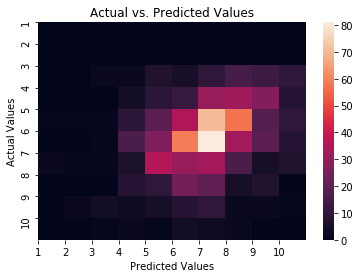

In [57]:
# How well did we do?
import seaborn as sns

rmse, perc_rated, actual_v_pred, preds, acts = validation_comparison(val_df)
print(rmse, perc_rated)
sns.heatmap(actual_v_pred);
plt.xticks(np.arange(10), np.arange(1,11));
plt.yticks(np.arange(10), np.arange(1,11));
plt.xlabel("Predicted Values");
plt.ylabel("Actual Values");
plt.title("Actual vs. Predicted Values");

C:\Users\guhemant\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\guhemant\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


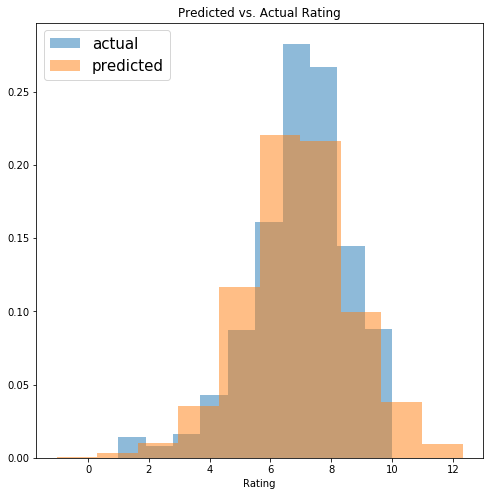

In [58]:
plt.figure(figsize=(8,8))
plt.hist(acts, normed=True, alpha=.5, label='actual');
plt.hist(preds, normed=True, alpha=.5, label='predicted');
plt.legend(loc=2, prop={'size': 15});
plt.xlabel('Rating');
plt.title('Predicted vs. Actual Rating');

We didn't do so bad on making those predictions!  But, how many user-movie pairs were we unable to make predictions for?  Use the cell below to answer this question.

In [59]:
# From the above, this can be calculated as follows:
print("Number not rated {}".format(int(len(val_df['rating'])*(1-perc_rated))))
print("Number rated {}.".format(int(len(val_df['rating'])*perc_rated)))

Number not rated 1041
Number rated 959.


In [60]:
# Subset so movie_content is only using the dummy variables for each genre and the 3 century based year dummy columns
movie_content = np.array(movies.iloc[:,4:])

# Take the dot product to obtain a movie x movie matrix of similarities
dot_prod_movies = movie_content.dot(np.transpose(movie_content))

### Rank Based For New Users

In this last part here, we need a way to make recommendations to new users.

In [61]:
def create_ranked_df(movies, reviews):
        '''
        INPUT
        movies - the movies dataframe
        reviews - the reviews dataframe
        
        OUTPUT
        ranked_movies - a dataframe with movies that are sorted by highest avg rating, more reviews, 
                        then time, and must have more than 4 ratings
        '''
        
        # Pull the average ratings and number of ratings for each movie
        movie_ratings = reviews.groupby('movie_id')['rating']
        avg_ratings = movie_ratings.mean()
        num_ratings = movie_ratings.count()
        last_rating = pd.DataFrame(reviews.groupby('movie_id').max()['date'])
        last_rating.columns = ['last_rating']

        # Add Dates
        rating_count_df = pd.DataFrame({'avg_rating': avg_ratings, 'num_ratings': num_ratings})
        rating_count_df = rating_count_df.join(last_rating)

        # merge with the movies dataset
        movie_recs = movies.set_index('movie_id').join(rating_count_df)

        # sort by top avg rating and number of ratings
        ranked_movies = movie_recs.sort_values(['avg_rating', 'num_ratings', 'last_rating'], ascending=False)

        # for edge cases - subset the movie list to those with only 5 or more reviews
        ranked_movies = ranked_movies[ranked_movies['num_ratings'] > 4]
        
        return ranked_movies
    

def popular_recommendations(user_id, n_top, ranked_movies):
    '''
    INPUT:
    user_id - the user_id (str) of the individual you are making recommendations for
    n_top - an integer of the number recommendations you want back
    ranked_movies - a pandas dataframe of the already ranked movies based on avg rating, count, and time

    OUTPUT:
    top_movies - a list of the n_top recommended movies by movie title in order best to worst
    '''

    top_movies = list(ranked_movies['movie'][:n_top])

    return top_movies
        

In [62]:
ranked_movies = create_ranked_df(movies, reviews)

In [63]:
def make_recommendations(_id, _id_type='movie', train_data=train_data_df, 
                         train_df=train_df, movies=movies, rec_num=5, user_mat=user_mat):
    '''
    INPUT:
    _id - either a user or movie id (int)
    _id_type - "movie" or "user" (str)
    train_data - dataframe of data as user-movie matrix
    train_df - dataframe of training data reviews
    movies - movies df
    rec_num - number of recommendations to return (int)
    user_mat - the U matrix of matrix factorization
    movie_mat - the V matrix of matrix factorization
    
    OUTPUT:
    recs - (array) a list or numpy array of recommended movies like the 
                   given movie, or recs for a user_id given
    '''
    # if the user is available from the matrix factorization data, 
    # I will use this and rank movies based on the predicted values
    # For use with user indexing
    val_users = train_data_df.index
    rec_ids = create_ranked_df(movies, train_df)
    
    if _id_type == 'user':
        if _id in train_data.index:
            # Get the index of which row the user is in for use in U matrix
            idx = np.where(val_users == _id)[0][0]
            
            # take the dot product of that row and the V matrix
            preds = np.dot(user_mat[idx,:],movie_mat)
            
            # pull the top movies according to the prediction
            indices = preds.argsort()[-rec_num:][::-1] #indices
            rec_ids = train_data_df.columns[indices]
            rec_names = movie_names(rec_ids)
            
        else:
            # if we don't have this user, give just top ratings back
            rec_names = popular_recommendations(_id, rec_num, ranked_movies)
            
    # Find similar movies if it is a movie that is passed
    else:
        rec_ids = find_similar_movies(_id)
        rec_names = movie_names(rec_ids)
    
    return rec_ids, rec_names

In [64]:
make_recommendations(48, 'user')

(Int64Index([92965, 838283, 1659337, 1205489, 421715], dtype='int64', name='movie_id'),
 array(['Empire of the Sun (1987)',
        'The Curious Case of Benjamin Button (2008)',
        'Step Brothers (2008)', 'Gran Torino (2008)',
        'The Perks of Being a Wallflower (2012)'], dtype=object))

In [67]:
# Make recommendations
user_recs_dict_with_top = dict()
for user_id in set(val_df['user_id']):
    user_recs_dict_with_top[user_id] = make_recommendations(user_id, 'user')[1]

In [68]:
cnter = 0
for user, rec in user_recs_dict_with_top.items():
    if cnter < 12:
        print("For user {}, our recommendations are: \n {}".format(user, rec))
        cnter+=1
    else:
        break

For user 32774, our recommendations are: 
 ['Taegukgi hwinalrimyeo (2004)' 'Lincoln (2012)' 'Blood Diamond (2006)'
 'The Fall (2006)' "De rouille et d'os (2012)"]
For user 16395, our recommendations are: 
 ['Empire of the Sun (1987)' 'Casino (1995)' 'Blood Diamond (2006)'
 'Silver Linings Playbook (2012)' 'Django Unchained (2012)']
For user 24589, our recommendations are: 
 ['Empire of the Sun (1987)' 'The Shawshank Redemption (1994)'
 'Silver Linings Playbook (2012)' 'Incendies (2010)'
 'Django Unchained (2012)']
For user 49174, our recommendations are: 
 ['Empire of the Sun (1987)' 'Casino (1995)' 'Fight Club (1999)'
 'Argo (2012)' 'Django Unchained (2012)']
For user 8216, our recommendations are: 
 ['Empire of the Sun (1987)' 'Casino (1995)' 'The Fall (2006)'
 'Arbitrage (2012)' 'Django Unchained (2012)']
For user 8234, our recommendations are: 
 ['Empire of the Sun (1987)' 'Blood Diamond (2006)' 'The Fall (2006)'
 'The Hobbit: An Unexpected Journey (2012)' 'Django Unchained (2012)'

**This recommendation style looks like it may do okay with accuracy, but it seems like a lot of the same movies are showing up.  When we think back to serendipity, novelty, and diversity as means of a good recommendation system, this set of recommendations still isn't great.  We might consider providing some content based recommendations from movies an individual has watched along with these recommendations to meet those categories of a good recommender.**